## Image stitching



### 1. Data import and SIFT Extraction

Complete ***get_panorama_data(..)*** in _dataset.py_ to read the images and extract the SIFT keypoints and descriptors per image. Check your implementation by plotting the result using ***utils.plot_keypoints(..)***.


***Submission:*** Save the *second* image (from left) of the campus dataset as **task2_keypoints.png** using ***utils.plot_keypoints(..)***.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport transforms, panorama, mapping, dataset, utils
import matplotlib.pyplot as plt
import numpy as np
import transforms
import panorama
import mapping
import dataset
import utils
import cv2

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150

data_path = 'data/campus'

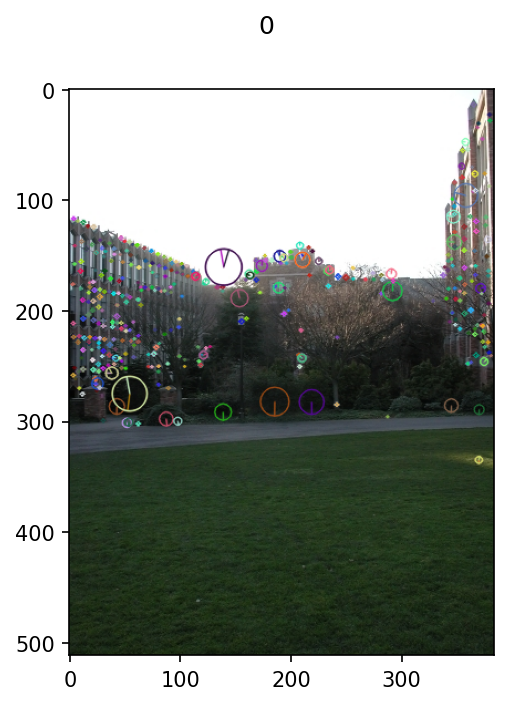

Number of images:  5
Keypoints length:  512
Descriptor shape:  (512, 128)


In [4]:
images, keypoints, descriptors = dataset.get_panorama_data(data_path)

utils.plot_keypoints(images[0],keypoints[0],group_no='0',name='task2_keypoints.png')

# check import
print('Number of images: ',len(images))
print('Keypoints length: ', len(keypoints[0]))
print('Descriptor shape: ',descriptors[0].shape)

#### 1.1 Matching

Let's take a look at the matching. Plot the matches between two adjacent images using ***mapping.calculate_matches(..)*** and ***utils.plot_matches(..)***.


***Submission:*** Save plot of matches between the *second and the third image* image of the campus dataset as **task2_matches.png** using ***utils.plot_matches(..)***.


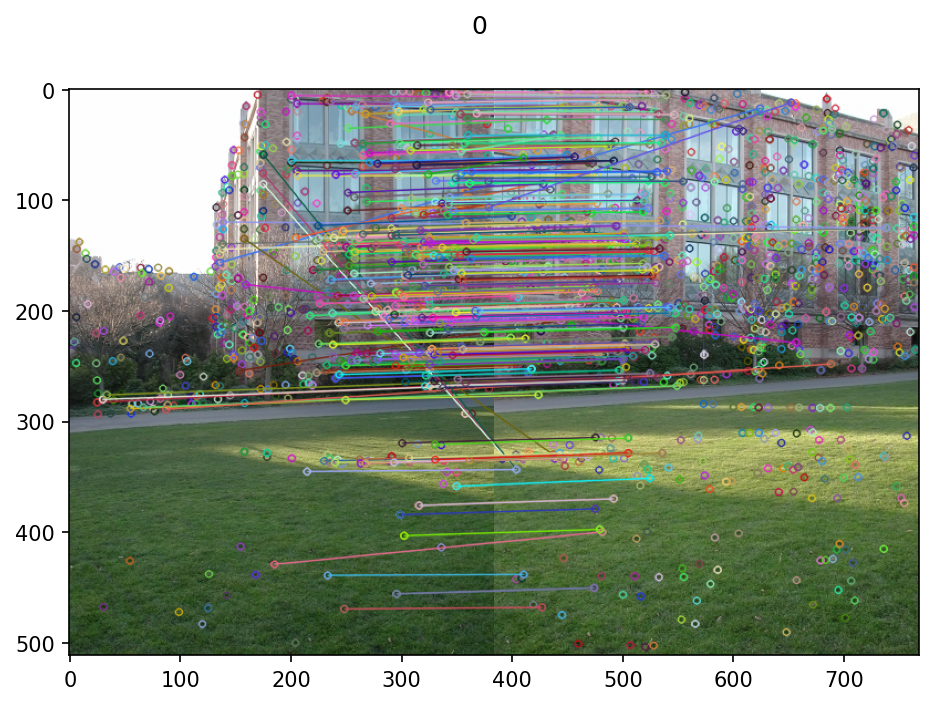

In [5]:
index1 = 1
index2 = 2

matches = mapping.calculate_matches(descriptors[index1],descriptors[index2])

utils.plot_matches(images[index1],images[index2],keypoints[index1],keypoints[index2],matches,group_no='0', name='task2_matches.png')

### 2. Image Registration using RANSAC

As you can see in the keypoint matching plot above, the matching algorithm still has some wrong connections. To remove those outliers, you will implement RANSAC and use the remaining inliers to estimate a final tranformation matrix (homography) between two given images. Implement RANSAC in ***get_transform(..)*** in _transforms.py_.

Check your implementation by plotting the result using ***utils.plot_matches(..)***.


***Submission:*** Save a plot showing the matches between the *second and the third image* of the campus dataset again, using the calculated inliers, as **task2_matches_ransac.png** using ***utils.plot_matches(..)***.

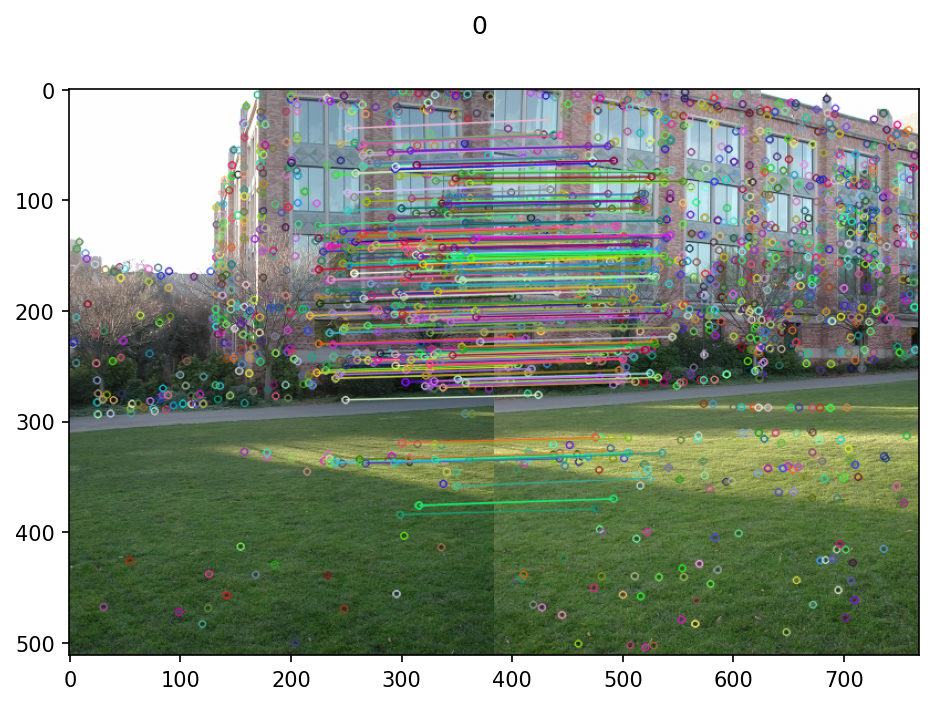

In [6]:
homography, inliers = transforms.get_transform(keypoints[index1],keypoints[index2],matches)

utils.plot_matches(images[index1],images[index2],keypoints[index1],keypoints[index2],matches,inliers,group_no='0', name='task2_matches_ransac.png')

#### 2.1 Align Images

Test your homography after RANSAC by transforming a chosen image to the corresponding image on the right and plot with ***transforms.plot_transformed_image(..)***.

_***HINT:***_
_cv2.warpPerspective(..)_


***Submission:*** Save the second image of the campus dataset transformed onto the third one as **task2_matches_transformed.png** using ***utils.plot_transformed_image(..)***.

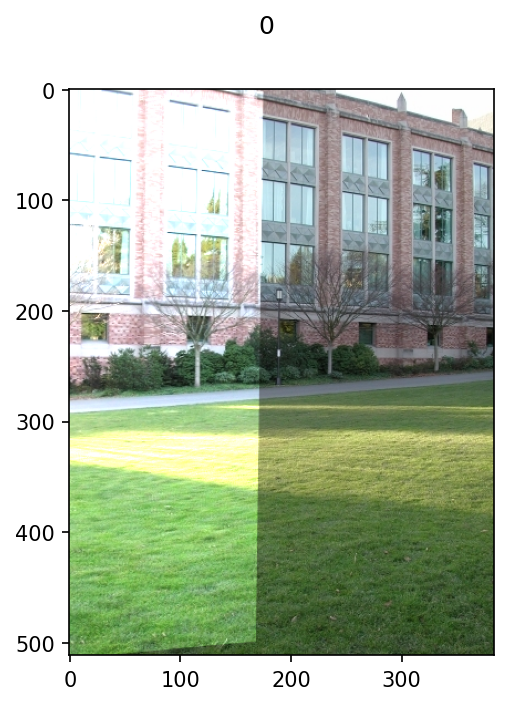

In [8]:
result = cv2.warpPerspective(images[index1], homography, (images[index2].shape[1], images[index2].shape[0]))

utils.plot_transformed_image(result,images[index2],group_no='0',name='tast2_matches_transformed.png')

### 3. Image Stitching

Before, you implemented the basics to calculated homographies between two images. Further, transform all images to a reference image, usually the center one, to get a balanced panorama. Implement and use the method ***to_center(..)*** in _transforms.py_ to get all homographies to the center image.


In [13]:
homographies = transforms.to_center(descriptors,keypoints)

#### Panorama Extents

One final step before panorama composition is to estimate the final panorama size based on the obtained homographies. Implement ***transforms.get_panorama_extents(..)***

In [10]:
T, width, height = transforms.get_panorama_extents(images, homographies)

print("Panorama dimension: ", height, " ",width)

Panorama dimension:  723   1567


#### Simple Panorama  

Here is where the magic happens. Using the homographies, translation matrix and panorama extents, you can now stitch the images to a panorama. Implement ***panorama.get_simple(..)*** and check your result with ***utils.plot_panorama(..)***.

***Submission:*** Save the campus panorama as **task2_panorama_simple.png** using ***utils.plot_panorama(..)***.

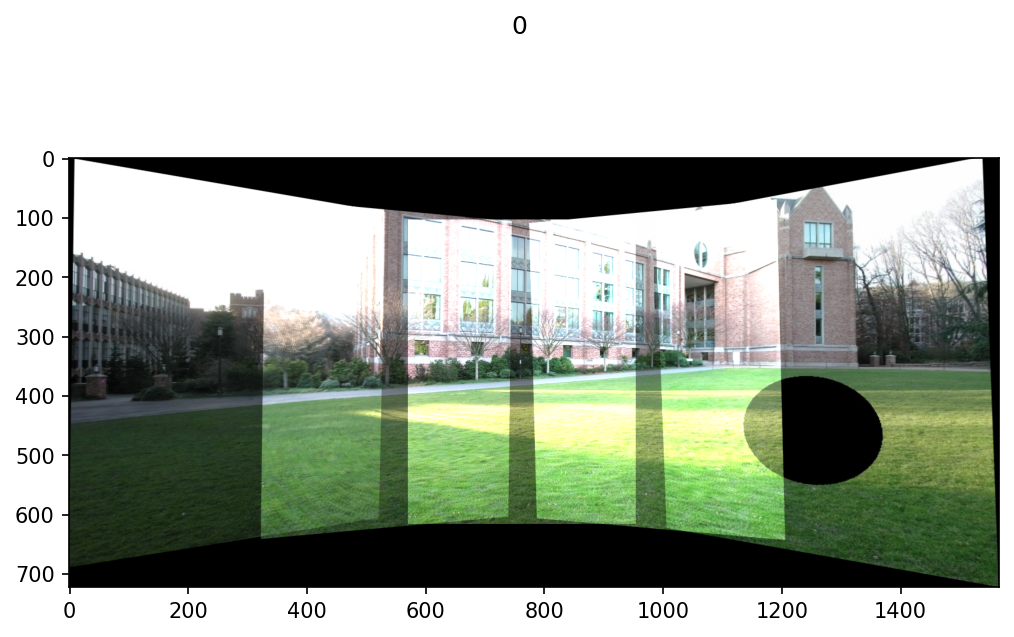

In [11]:
result = panorama.get_simple(images,width,height,homographies,T)

utils.plot_panorama(result,group_no='0',name='tast2_panorama_simple.png')

### 4. Panorama Feathering

The simple panorama might look geometrically correct, but not pleasant enough yet. The intensities are simply stacked. Implement a color blending method to improve the panorama output. 

Complete ***panorama.get_blended(..)*** and check your result with ***utils.plot_panorama(..)***.

***Submission:*** Save the improved blended campus panorama as **task2_panorama_blended.png** using ***utils.plot_panorama(..)***.

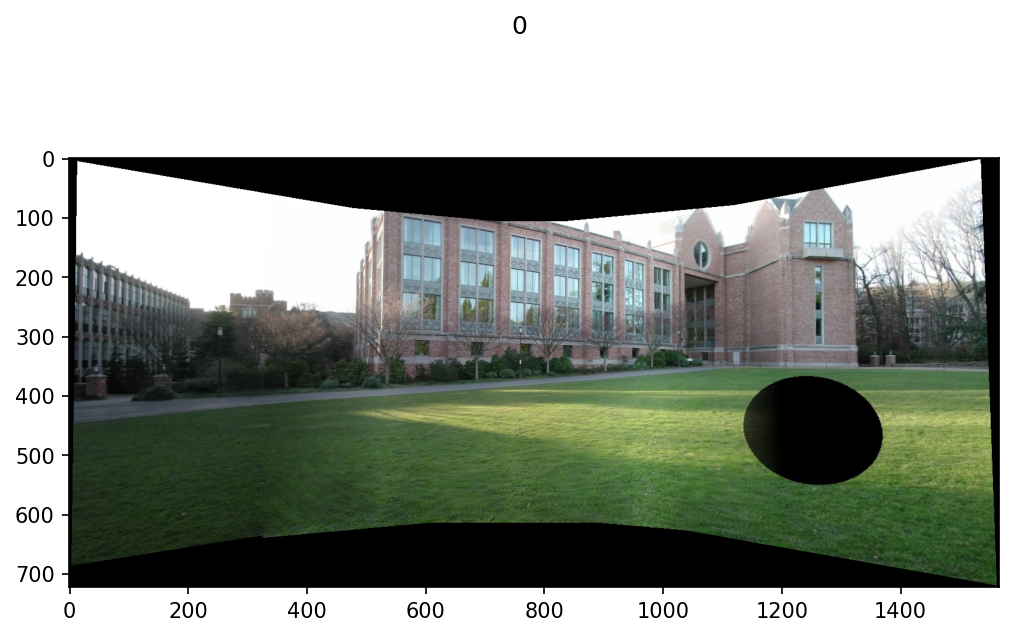

In [12]:
final = panorama.get_blended(images,width,height,homographies,T)

utils.plot_panorama(final,group_no='0',name='task2_panorama_blended.png')